In [1]:
import pickle
from tqdm import tqdm

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
with open('../data/data_train.pt', 'rb') as file:
    X_train, y_train = pickle.load(file)

print(f'{X_train.shape = }')
print(f'{y_train.shape = }')

X_train.shape = (2488918, 33)
y_train.shape = (2488918, 2)


# All features

In [3]:
pca_score = {'n_components': [], 'score': [], 'explained_variance_ratio_': []}

for n_components in tqdm(range(X_train.shape[1])):
    pca_score['n_components'].append(n_components)
    pca = PCA(n_components=n_components).fit(X_train)
    try:
        pca_score['score'].append(pca.score(X_train))
    except:
        pca_score['score'].append(0)
    pca_score['explained_variance_ratio_'].append(pca.explained_variance_ratio_)

 36%|███▋      | 12/33 [02:34<04:54, 14.03s/it]/home/paulsaegert/.local/lib/python3.8/site-packages/sklearn/decomposition/_base.py:72: RuntimeWarning: divide by zero encountered in true_divide
  precision.flat[::len(precision) + 1] += 1. / exp_var_diff
 39%|███▉      | 13/33 [02:48<04:43, 14.20s/it]/home/paulsaegert/.local/lib/python3.8/site-packages/sklearn/decomposition/_base.py:72: RuntimeWarning: divide by zero encountered in true_divide
  precision.flat[::len(precision) + 1] += 1. / exp_var_diff
 42%|████▏     | 14/33 [03:06<04:51, 15.32s/it]/home/paulsaegert/.local/lib/python3.8/site-packages/sklearn/decomposition/_base.py:72: RuntimeWarning: divide by zero encountered in true_divide
  precision.flat[::len(precision) + 1] += 1. / exp_var_diff
 45%|████▌     | 15/33 [03:25<04:55, 16.41s/it]/home/paulsaegert/.local/lib/python3.8/site-packages/sklearn/decomposition/_base.py:72: RuntimeWarning: divide by zero encountered in true_divide
  precision.flat[::len(precision) + 1] += 1. / e

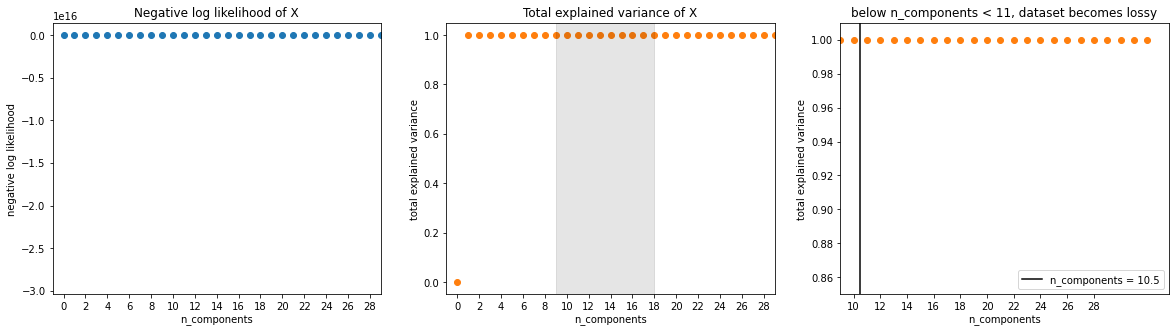

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.scatter(pca_score['n_components'], pca_score['score'])
ax1.set_xlabel('n_components'); ax1.set_ylabel('negative log likelihood')
ax1.set_title('Negative log likelihood of X'); ax1.set_xticks(range(0, 29, 2)); ax1.set_xlim(-1, 29);

ax2.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax2.set_xlabel('n_components'); ax2.set_ylabel('total explained variance'); ax2.axvspan(9, 18, color='black', alpha=0.1)
ax2.set_title('Total explained variance of X'); ax2.set_xticks(range(0, 29, 2)); ax2.set_xlim(-1, 29);

# Without county-data

In [8]:
pca_score = {'n_components': [], 'score': [], 'explained_variance_ratio_': []}

for n_components in tqdm(range(X_train[:, :16].shape[1])):
    pca_score['n_components'].append(n_components)
    pca = PCA(n_components=n_components).fit(X_train[:, :16])
    try:
        pca_score['score'].append(pca.score(X_train[:, :16]))
    except:
        pca_score['score'].append(0)
    pca_score['explained_variance_ratio_'].append(pca.explained_variance_ratio_)

100%|██████████| 16/16 [02:10<00:00,  8.15s/it]


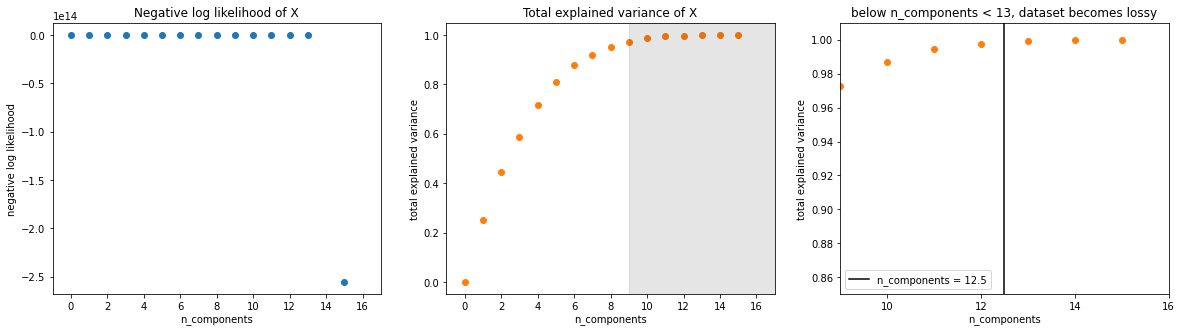

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.scatter(pca_score['n_components'], pca_score['score'])
ax1.set_xlabel('n_components'); ax1.set_ylabel('negative log likelihood')
ax1.set_title('Negative log likelihood of X'); ax1.set_xticks(range(0, 17, 2)); ax1.set_xlim(-1, 17);

ax2.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax2.set_xlabel('n_components'); ax2.set_ylabel('total explained variance'); ax2.axvspan(9, 17, color='black', alpha=0.1)
ax2.set_title('Total explained variance of X'); ax2.set_xticks(range(0, 17, 2)); ax2.set_xlim(-1, 17);

ax3.scatter(pca_score['n_components'], [sum(ratios) for ratios in pca_score['explained_variance_ratio_']], color='tab:orange')
ax3.set_xlabel('n_components'); ax3.set_ylabel('total explained variance'); ax3.set_xticks(range(0, 17, 2)); ax3.set_xlim(9, None); ax3.set_ylim(0.85, 1.01)
ax3.axvline(12.5, color='black', label='n_components = 12.5'); ax3.set_title('below n_components < 13, dataset becomes lossy'); ax3.legend();